In [87]:
# Import Liberies

# hide warnings
import warnings
warnings.filterwarnings('ignore')
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# importing libraries for data manipulation
import numpy as np
import pandas as pd
# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
# Importing RFE - LinearRegression - Split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import os


In [88]:
# reading the dataset
house = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [89]:
#Function to Check Nan in % 
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)  # percentage of values that are null
    types = df.dtypes
    missing_data = pd.concat([total, percent, types], axis=1, keys=['Total', 'Percent', 'Types'])  # putting the above two together
    return missing_data # return the dataframe


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">DataFrame Exploration</span>

In [90]:
# Head
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [91]:
# Tail
house.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Observations: 
 - **id**: variable has not a predictive power, we can drop it



In [92]:
#Drop ['Id'] variable
house = house.drop(['Id'], axis=1)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [93]:
house.shape

(1460, 80)

In [94]:
#Check the columns
columns = house.columns
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [95]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [96]:
house.value_counts() 

Series([], dtype: int64)

In [97]:
#Verify the Nan Values in the columns
house.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [98]:
# Fill with NA or No xxxxx  or 0 Colums with Nulls
house['Alley'].fillna('No Alley', inplace=True)
house['MasVnrType'].fillna('None', inplace=True)
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['PoolQC'].fillna('No Pool', inplace=True) 
house['Fence'].fillna('No Fence', inplace=True) 
house['MasVnrArea'].fillna(0, inplace=True) 
house['LotFrontage'].fillna(0, inplace=True) 
house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

In [99]:
# MiscFeature column has almost 99% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

In [100]:
house.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,12,2008,WD,Normal,250000


In [101]:
#Verify the Nan Values in the columns
#Verify the Nan Values in the columns
house.isnull().sum().sort_values(ascending=False)

GarageYrBlt     81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SalePrice        0
Length: 79, dtype: int64

In [102]:
missing_check(house)

,Total,Percent,Types
GarageYrBlt,81,5.547945,float64
BsmtFinType2,38,2.602740,object
BsmtExposure,38,2.602740,object
BsmtQual,37,2.534247,object
BsmtFinType1,37,2.534247,object
...,...,...,...
MasVnrType,0,0.000000,object
Exterior2nd,0,0.000000,object
Exterior1st,0,0.000000,object
RoofMatl,0,0.000000,object


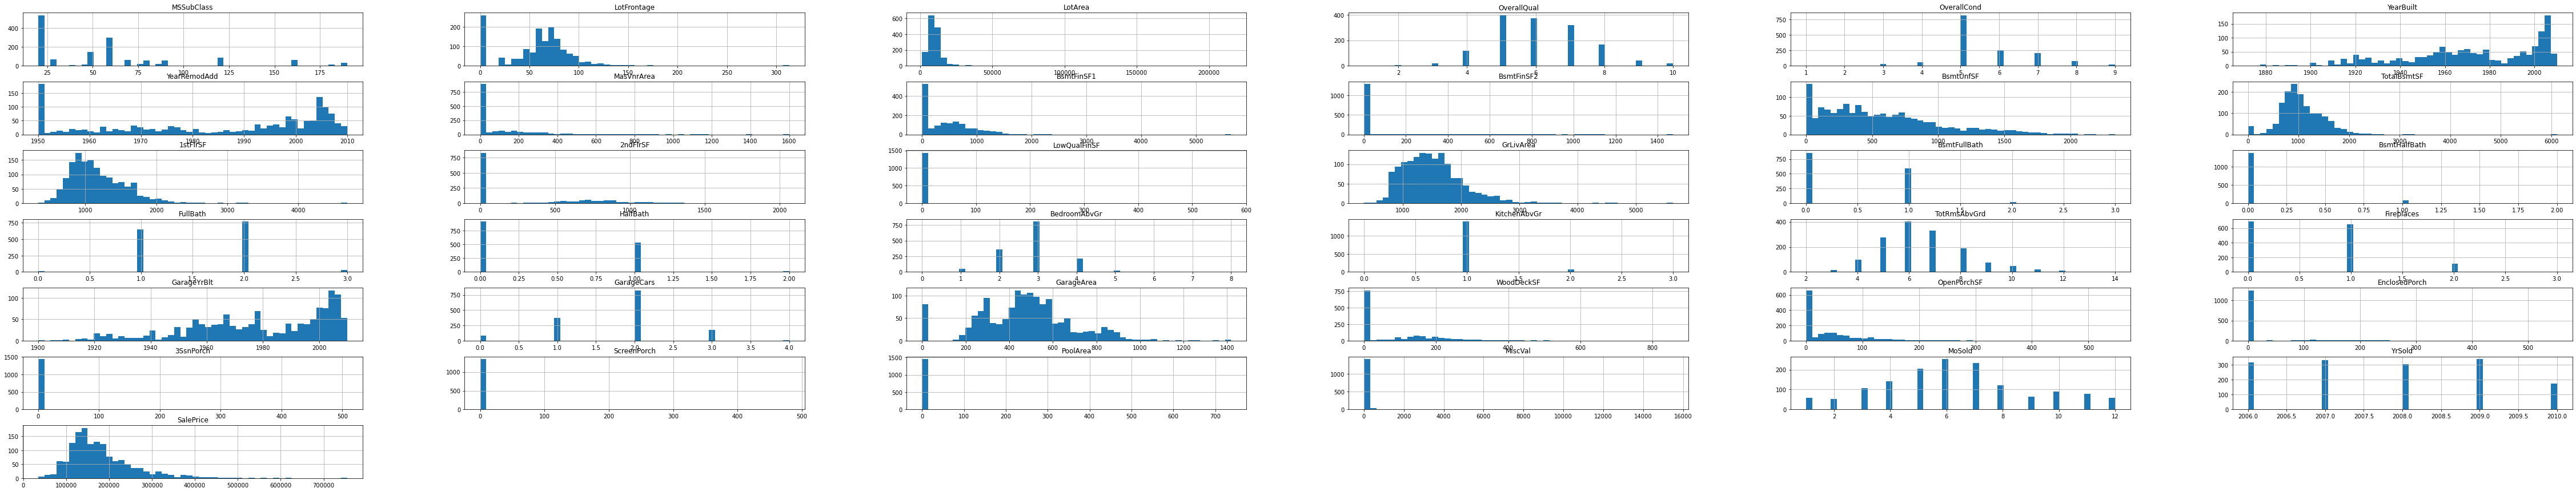

In [103]:
# Plot Data Frame and feel a categorical variables types.
house.hist(bins=50, figsize=(80,15))
plt.show()

In [104]:
#converting year to number of years
house['YearBuilt'] = 2023 - house['YearBuilt']
house['YearRemodAdd'] = 2023 - house['YearRemodAdd']
house['GarageYrBlt'] = 2023 - house['GarageYrBlt']
house['YrSold'] = 2023 - house['YrSold']

#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [105]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [106]:
# creating dummy variables for categorical variables
# subset all categorical variables
house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [107]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [108]:
# drop categorical variables 
final_house = house.drop(list(house_categorical.columns), axis=1)
columns_no_categorical = final_house.columns
columns_no_categorical

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [109]:
# concat dummy variables with house
final_house = pd.concat([final_house, house_dummies], axis=1)

In [110]:
final_house.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,20,20,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,47,47,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,22,21,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,108,53,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,23,23,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [111]:
final_house.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,51.732192,38.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,34.664304,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,0.000000,1300.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,7553.500000,23.000000,19.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,63.000000,9478.500000,50.000000,29.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11601.500000,69.000000,56.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,151.000000,73.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
missing_check(final_house)

,Total,Percent,Types
GarageYrBlt,81,5.547945,float64
LotFrontage,0,0.000000,float64
Electrical_FuseP,0,0.000000,uint8
CentralAir_Y,0,0.000000,uint8
HeatingQC_TA,0,0.000000,uint8
...,...,...,...
HouseStyle_1.5Unf,0,0.000000,uint8
BldgType_TwnhsE,0,0.000000,uint8
BldgType_Twnhs,0,0.000000,uint8
BldgType_Duplex,0,0.000000,uint8


In [113]:
final_house['GarageYrBlt']

0       20.0
1       47.0
2       22.0
3       25.0
4       23.0
        ... 
1455    24.0
1456    45.0
1457    82.0
1458    73.0
1459    58.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [114]:
mean_GarageYtBlt = final_house['GarageYrBlt'].mean()
mean_GarageYtBlt

44.493836113125454

In [115]:
final_house['GarageYrBlt'] = final_house['GarageYrBlt'].fillna(mean_GarageYtBlt)

In [116]:
missing_check(final_house)

,Total,Percent,Types
LotFrontage,0,0.0,float64
Heating_Grav,0,0.0,uint8
CentralAir_Y,0,0.0,uint8
HeatingQC_TA,0,0.0,uint8
HeatingQC_Po,0,0.0,uint8
...,...,...,...
BldgType_TwnhsE,0,0.0,uint8
BldgType_Twnhs,0,0.0,uint8
BldgType_Duplex,0,0.0,uint8
BldgType_2fmCon,0,0.0,uint8


In [117]:
# Split DataFrame into Train and Test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(final_house, train_size = 0.70, test_size = 0.30, random_state = 333)

In [118]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the numeric variables

df_train[columns_no_categorical] = scaler.fit_transform(df_train[columns_no_categorical])
df_test[columns_no_categorical] = scaler.fit_transform(df_test[columns_no_categorical])

In [119]:
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
174,-0.294506,0.209992,-0.497241,-0.058815,0.162471,2.263104,1.031079,-1.297378,1.344758,1.355320,...,0,0,0,0,1,0,0,0,1,0
1157,-0.682648,-0.593497,-1.183697,-1.119091,0.348298,1.114569,-0.297660,-0.378091,0.638731,0.425328,...,0,0,0,0,1,0,0,0,1,0
921,0.302636,-0.184330,2.313959,-0.878119,-0.558973,1.533063,-0.297660,-0.875852,0.537179,0.309423,...,0,0,0,0,1,0,0,0,1,0
184,1.049063,-0.329424,2.052452,-0.299787,-0.558973,-0.987203,-0.297660,-0.167328,-1.319769,-0.617809,...,0,0,0,0,1,0,0,0,1,0
620,-0.354220,-0.241652,1.856322,1.676182,-0.558973,-0.891880,-0.297660,0.547922,-0.449325,-0.816502,...,0,0,0,0,1,0,0,0,1,0


In [120]:
df_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,8.481625e-17,7.522006e-17,1.096087e-16,-1.285292e-16,8.851337e-17,-1.018882e-16,3.262164e-19,-3.577506e-17,-1.162961e-16,2.661926e-16,...,0.002938,0.002938,0.084231,0.0,0.871694,0.000979,0.007835,0.014691,0.822723,0.087169
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.054153,0.054153,0.277870,0.0,0.334594,0.031296,0.088214,0.120374,0.382090,0.282221
min,-1.697790e+00,-9.945376e-01,-1.249074e+00,-1.215480e+00,-5.589734e-01,-9.872034e-01,-2.976598e-01,-1.297378e+00,-2.538391e+00,-2.279101e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.736487e-01,-3.129531e-01,-9.875668e-01,-9.263134e-01,-5.589734e-01,-9.872034e-01,-2.976598e-01,-7.928915e-01,-6.306672e-01,-7.502708e-01,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.363606e-02,-1.015427e-01,-3.960384e-02,-3.961755e-01,-5.589734e-01,-1.664892e-01,-2.976598e-01,-2.076867e-01,-1.349975e-01,-1.873082e-01,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.310638e-01,1.291558e-01,5.814753e-01,8.568777e-01,3.155048e-01,6.170255e-01,-2.976598e-01,5.322273e-01,6.024623e-01,6.405779e-01,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.736202e+00,1.670715e+01,3.229234e+00,1.676182e+00,8.185809e+00,4.099830e+00,6.901804e+00,3.530000e+00,5.213400e+00,4.065267e+00,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
# correlation matrix
columns_no_categorical
cor = df_train[columns_no_categorical].corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.001564,-0.042211,-0.090517,0.088997,0.029956,-0.040119,0.164741,0.193621,0.187134,...,-0.025723,0.044769,0.056080,0.025370,0.051315,0.070399,-0.048456,0.000381,0.031768,0.213782
LotArea,0.001564,1.000000,-0.014872,-0.026961,0.113709,0.188862,0.029300,0.008813,0.217005,0.275421,...,0.218162,0.057754,-0.015006,0.026555,0.047794,0.051401,0.079131,0.011826,0.043378,0.273955
YearBuilt,-0.042211,-0.014872,1.000000,0.584890,-0.318126,-0.246428,0.055768,-0.171143,-0.419727,-0.296109,...,-0.223108,-0.182495,0.397231,-0.017513,0.062293,0.008204,0.041317,-0.028137,-0.031668,-0.523318
YearRemodAdd,-0.090517,-0.026961,0.584890,1.000000,-0.199737,-0.124209,0.053606,-0.200421,-0.325013,-0.265374,...,-0.216864,-0.222061,0.187757,-0.041111,0.047217,-0.000830,0.063678,-0.029230,0.018732,-0.514058
MasVnrArea,0.088997,0.113709,-0.318126,-0.199737,1.000000,0.234896,-0.074078,0.128090,0.354376,0.338268,...,0.123263,0.104856,-0.113085,0.022157,0.070186,-0.018421,-0.038236,-0.012026,0.025506,0.506896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolArea,0.070399,0.051401,0.008204,-0.000830,-0.018421,0.069041,0.066162,-0.047032,0.046125,0.085100,...,0.074864,0.051965,0.079691,-0.007482,0.077337,1.000000,0.068483,-0.025969,0.086706,0.127799
MiscVal,-0.048456,0.079131,0.041317,0.063678,-0.038236,-0.001146,0.023992,-0.035601,-0.030503,-0.023593,...,0.009394,-0.001979,0.062091,-0.012123,0.071437,0.068483,1.000000,0.031229,-0.005997,-0.032467
MoSold,0.000381,0.011826,-0.028137,-0.029230,-0.012026,-0.030185,-0.003109,0.036119,0.006382,0.021923,...,0.023077,0.094481,-0.059470,0.011432,0.037942,-0.025969,0.031229,1.000000,0.121245,0.028050
YrSold,0.031768,0.043378,-0.031668,0.018732,0.025506,-0.017969,-0.052241,0.051228,0.016782,0.021097,...,0.007238,0.044507,-0.015078,0.017689,-0.030142,0.086706,-0.005997,0.121245,1.000000,0.043303


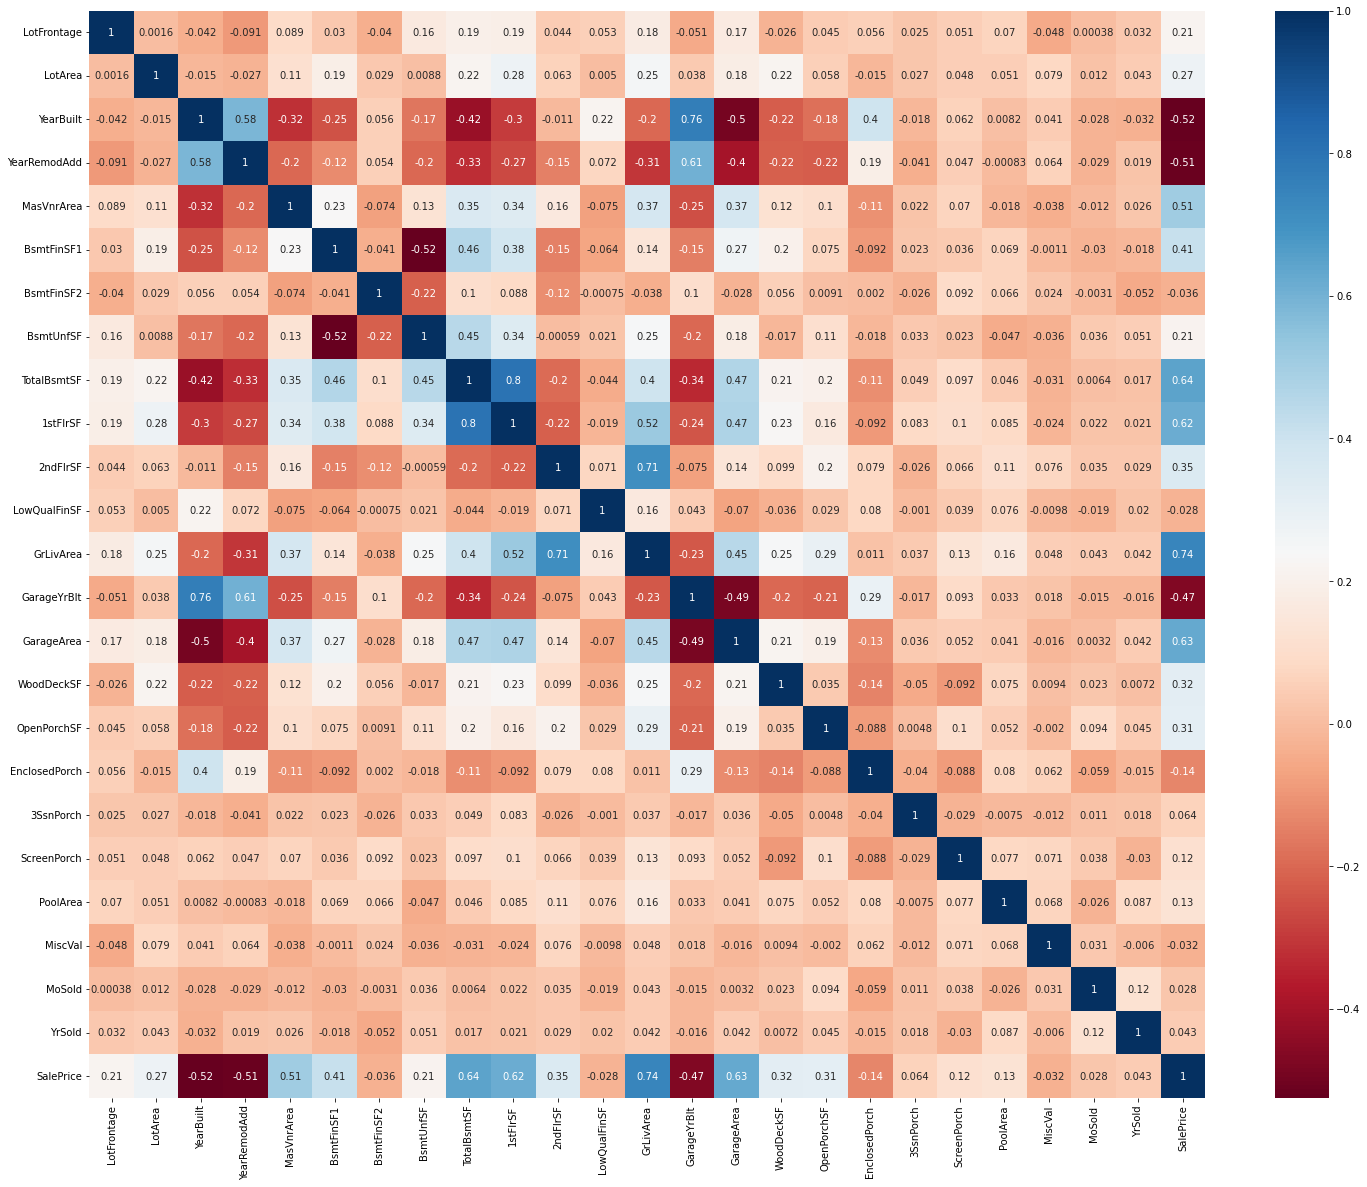

In [122]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis
plt.figure(figsize = (25,20))
sns.heatmap(df_train[columns_no_categorical].corr(), annot = True, cmap="RdBu")
plt.show()

# Plot with numerical variables an a pairplot
sns.pairplot(df_train[columns_no_categorical], diag_kind='kde')
plt.show()

## Model Building and Evaluation

In [123]:
# Create X and y Parameters
#Build a linear model with all variables
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [124]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
174,-0.294506,0.209992,-0.497241,-0.058815,0.162471,2.263104,1.031079,-1.297378,1.344758,1.355320,...,0,0,0,0,1,0,0,0,1,0
1157,-0.682648,-0.593497,-1.183697,-1.119091,0.348298,1.114569,-0.297660,-0.378091,0.638731,0.425328,...,0,0,0,0,1,0,0,0,1,0
921,0.302636,-0.184330,2.313959,-0.878119,-0.558973,1.533063,-0.297660,-0.875852,0.537179,0.309423,...,0,0,0,0,1,0,0,0,1,0
184,1.049063,-0.329424,2.052452,-0.299787,-0.558973,-0.987203,-0.297660,-0.167328,-1.319769,-0.617809,...,0,0,0,0,1,0,0,0,1,0
620,-0.354220,-0.241652,1.856322,1.676182,-0.558973,-0.891880,-0.297660,0.547922,-0.449325,-0.816502,...,0,0,0,0,1,0,0,0,1,0


In [125]:
y_train.head()

174     0.034336
1157    0.599679
921    -0.433916
184    -0.666198
620    -1.403603
Name: SalePrice, dtype: float64

In [126]:
X_train.shape

(1021, 307)

In [127]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [128]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 234),
 ('LotArea', False, 144),
 ('YearBuilt', False, 94),
 ('YearRemodAdd', False, 275),
 ('MasVnrArea', False, 197),
 ('BsmtFinSF1', False, 46),
 ('BsmtFinSF2', False, 49),
 ('BsmtUnfSF', False, 48),
 ('TotalBsmtSF', False, 47),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 45),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', False, 279),
 ('GarageArea', False, 213),
 ('WoodDeckSF', False, 231),
 ('OpenPorchSF', False, 252),
 ('EnclosedPorch', False, 278),
 ('3SsnPorch', False, 218),
 ('ScreenPorch', False, 217),
 ('PoolArea', False, 66),
 ('MiscVal', False, 204),
 ('MoSold', False, 270),
 ('YrSold', False, 273),
 ('MSSubClass_30', False, 262),
 ('MSSubClass_40', False, 135),
 ('MSSubClass_45', False, 115),
 ('MSSubClass_50', False, 162),
 ('MSSubClass_60', False, 111),
 ('MSSubClass_70', False, 183),
 ('MSSubClass_75', False, 103),
 ('MSSubClass_80', False, 113),
 ('MSSubClass_85', False, 109),
 ('MSSubClass_90', False, 33),
 ('MSSubClass

In [129]:
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'BsmtCond_Po', 'BedroomAbvGr_8',
       'KitchenAbvGr_2', 'TotRmsAbvGrd_3', 'TotRmsAbvGrd_12', 'GarageCars_3'],
      dtype='object')

In [130]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=282)

### Building model using statsmodel, for the detailed statistics

In [131]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [132]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [133]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [134]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -460.13
No. Observations:                1021   AIC:                             972.3
Df Residuals:                     995   BIC:                             1100.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2901      0.060  

In [135]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,101.19
2,2ndFlrSF,76.94
1,1stFlrSF,52.92
0,const,24.71
12,OverallCond_5,5.31
...,...,...
4,OverallQual_2,1.07
23,TotRmsAbvGrd_3,1.06
20,BsmtCond_Po,1.04
18,RoofMatl_Tar&Grv,1.03


In [136]:
# Dropping highly correlated variables and insignificant variables
# Dropping the variable and updating the model As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, BedroomAbvGr_8 as it has a very high p-value of 0.667. Let's go ahead and drop this variables
X_train_rfe = X_train_rfe.drop('BedroomAbvGr_8', 1,)

In [137]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     246.2
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -460.23
No. Observations:                1021   AIC:                             970.5
Df Residuals:                     996   BIC:                             1094.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2910      0.060  

In [138]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,91.82
2,2ndFlrSF,70.45
1,1stFlrSF,48.46
0,const,24.69
12,OverallCond_5,5.31
...,...,...
4,OverallQual_2,1.07
22,TotRmsAbvGrd_3,1.06
20,BsmtCond_Po,1.04
18,RoofMatl_Tar&Grv,1.03


In [139]:
# Dropping highly correlated variables and insignificant variables
# Dropping the variable and updating the model As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, RoofMatl_Metal as it has a very high p-value of 0.127. Let's go ahead and drop this variables
X_train_rfe = X_train_rfe.drop('RoofMatl_Metal', 1,)

In [140]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     256.5
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -461.42
No. Observations:                1021   AIC:                             970.8
Df Residuals:                     997   BIC:                             1089.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2912      0.060  

In [141]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,91.82
2,2ndFlrSF,70.45
1,1stFlrSF,48.46
0,const,24.69
12,OverallCond_5,5.30
...,...,...
18,RoofMatl_WdShngl,1.10
4,OverallQual_2,1.07
21,TotRmsAbvGrd_3,1.06
19,BsmtCond_Po,1.04


In [142]:
# Dropping highly correlated variables and insignificant variables
# Dropping the variable and updating the model As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, OverallQual_2 . Let's go ahead and drop this variables
X_train_rfe = X_train_rfe.drop('OverallQual_2', 1,)

In [143]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     267.6
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -462.85
No. Observations:                1021   AIC:                             971.7
Df Residuals:                     998   BIC:                             1085.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3143      0.058  

In [144]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,91.82
2,2ndFlrSF,70.44
1,1stFlrSF,48.44
0,const,23.36
11,OverallCond_5,5.08
...,...,...
21,TotRmsAbvGrd_12,1.13
17,RoofMatl_WdShngl,1.10
20,TotRmsAbvGrd_3,1.06
18,BsmtCond_Po,1.04


In [145]:
# Dropping highly correlated variables and insignificant variables
# Dropping the variable and updating the model As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, BsmtCond_Po . Let's go ahead and drop this variables
X_train_rfe = X_train_rfe.drop('BsmtCond_Po', 1,)

In [146]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     279.6
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -464.36
No. Observations:                1021   AIC:                             972.7
Df Residuals:                     999   BIC:                             1081.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3332      0.057  

In [147]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,91.81
2,2ndFlrSF,70.44
1,1stFlrSF,48.44
0,const,22.53
11,OverallCond_5,4.92
...,...,...
18,KitchenAbvGr_2,1.18
20,TotRmsAbvGrd_12,1.13
17,RoofMatl_WdShngl,1.10
19,TotRmsAbvGrd_3,1.06


In [148]:
# Dropping highly correlated variables and insignificant variables
# Dropping the variable and updating the model As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, RoofMatl_Tar&Grv . Let's go ahead and drop this variables
X_train_rfe = X_train_rfe.drop('RoofMatl_Tar&Grv', 1,)

In [149]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     292.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -465.94
No. Observations:                1021   AIC:                             973.9
Df Residuals:                    1000   BIC:                             1077.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3344      0.057  

In [150]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,GrLivArea,91.79
2,2ndFlrSF,70.41
1,1stFlrSF,48.38
0,const,22.52
11,OverallCond_5,4.92
...,...,...
15,OverallCond_9,1.28
17,KitchenAbvGr_2,1.18
19,TotRmsAbvGrd_12,1.13
16,RoofMatl_WdShngl,1.10


In [151]:
# Dropping highly correlated variables and insignificant variables
# Dropping the variable and updating the model As you can see from the summary and the VIF dataframe, some variables are correlarion VIF > 5
X_train_rfe = X_train_rfe.drop('GrLivArea', 1,)

In [152]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     304.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -471.97
No. Observations:                1021   AIC:                             983.9
Df Residuals:                    1001   BIC:                             1083.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3360      0.058  

In [153]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.52
10,OverallCond_5,4.91
11,OverallCond_6,3.18
12,OverallCond_7,2.99
5,OverallQual_5,2.13
...,...,...
14,OverallCond_9,1.28
16,KitchenAbvGr_2,1.18
18,TotRmsAbvGrd_12,1.10
15,RoofMatl_WdShngl,1.09


In [154]:
# Dropping highly correlated variables and insignificant variables
# Dropping the variable and updating the model As you can see from the summary and the VIF dataframe, some variables are correlarion VIF > 5
X_train_rfe = X_train_rfe.drop('const', 1,)

In [155]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     304.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:36   Log-Likelihood:                -471.97
No. Observations:                1021   AIC:                             983.9
Df Residuals:                    1001   BIC:                             1083.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3360      0.058  

In [156]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,OverallCond_5,2.48
4,OverallQual_5,2.39
18,GarageCars_3,2.15
5,OverallQual_6,2.07
6,OverallQual_8,1.83
...,...,...
17,TotRmsAbvGrd_12,1.11
14,RoofMatl_WdShngl,1.10
2,OverallQual_3,1.09
13,OverallCond_9,1.07


In [157]:
y_train_predict= lr_7.predict(X_train_lm)

In [158]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict) 

0.8524160536363068

Text(0.5, 0, 'Errors')

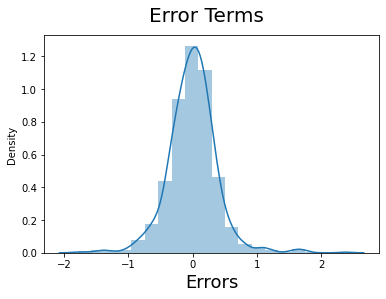

In [159]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

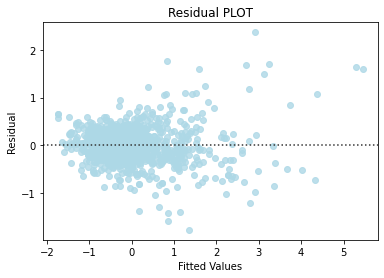

In [160]:
sns.residplot(x = y_train_predict, y = (y_train - y_train_predict), color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In [161]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train_predict,X_train_lm)
lzip(name, test)

[('F statistic', 1.418211481071668), ('p-value', 5.685228949842994e-05)]

As we can see from the above test the p-value is < 0.005.

Text(0.5, 1.0, 'MODEL Residuals Q-Q Plot')

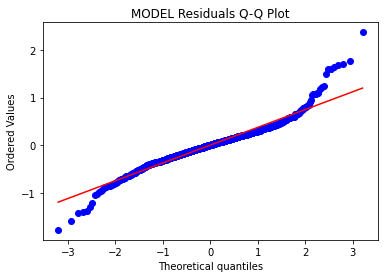

In [162]:
#Import library
from scipy import stats
stats.probplot((y_train - y_train_predict), dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")

In [163]:
# Conclusion: The last model lr5 is the best model to MLR

## Polynomial Regression

In [307]:
# Polynomial Regression model using the last Data Set Training
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(X_train_rfe) 
model2 = LinearRegression() 
model2.fit(x_poly2, y_train)
y_train_predict= model2.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.8914725532044977

Text(0, 0.5, 'y_pred')

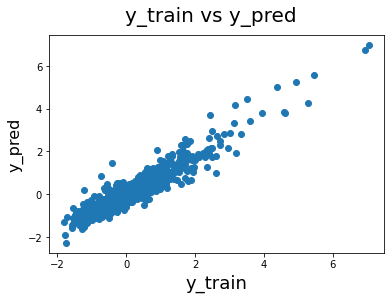

In [209]:
# Plotting y_train and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train, y_train_predict)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [210]:
# Polynomial Regression model using the last Data Set Training
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train_rfe) 
model = LinearRegression() 
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.9160138132139876

Text(0, 0.5, 'y_pred')

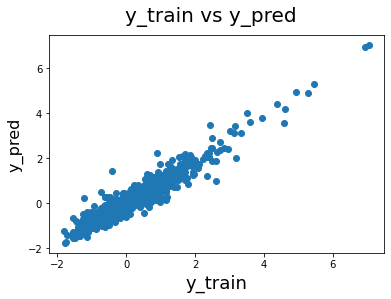

In [211]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_predict)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [212]:
# Polynomial Regression model using the last Data Set Training
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(X_train_rfe) 
model = LinearRegression() 
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.931008415458682

Text(0, 0.5, 'y_pred')

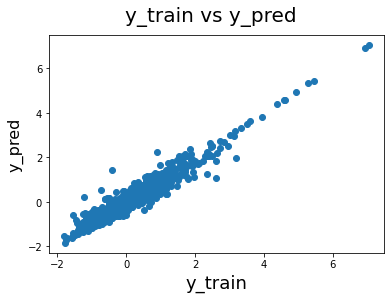

In [213]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train, y_train_predict)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [214]:
# Polynomial Regression model using the last Data Set Training
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(X_train_rfe) 
model = LinearRegression() 
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.9412256812705866

Text(0, 0.5, 'y_pred')

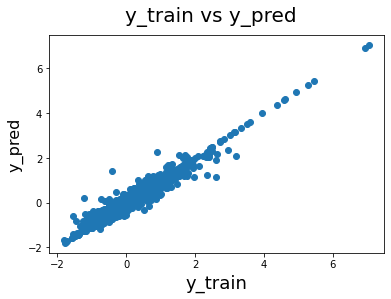

In [215]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train, y_train_predict)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'y_pred')

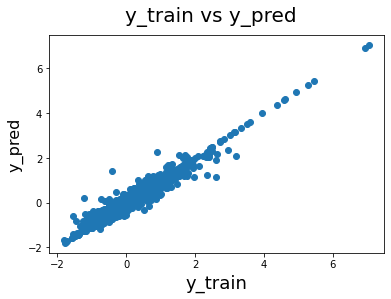

In [216]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train, y_train_predict)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

## Lasso 

In [248]:
# I use the polynomial grade = 2 to fit lasso
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.2)
model.fit(x_poly2, y_train)
y_train_predict= model.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.5510227516250751

In [249]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.4)
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.5128241712915143

In [250]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(x_poly, y_train)
y_train_predict= model.predict(x_poly)
r2_score(y_train, y_train_predict)

0.7135448639331037

In [251]:
## Lasso with k-fold cross validation and search the best Alpha
from sklearn.linear_model import LassoCV
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)
# Fit model
model.fit(x_poly2, y_train)
# Best Alpha
print("Estimated regularization parameter alpha: %s" % model.alpha_)

Estimated regularization parameter alpha: 0.0010064630116739318


**Best Lasso**

In [252]:
## Evaluate the model wit n=2 and alpha = 0.0010064630116739318
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(x_poly2, y_train)
print(list(zip(lasso_best.coef_, X)))

[(0.0, '1stFlrSF'), (0.42422791999637594, '2ndFlrSF'), (0.21686631454054084, 'OverallQual_3'), (-0.46795398853441195, 'OverallQual_4'), (-0.5242886152676051, 'OverallQual_5'), (-0.4157348594076617, 'OverallQual_6'), (-0.20378884394755184, 'OverallQual_8'), (0.19920305071772307, 'OverallQual_9'), (0.0, 'OverallQual_10'), (0.10792581845934138, 'OverallCond_5'), (0.348447589362209, 'OverallCond_6'), (0.11448408907386817, 'OverallCond_7'), (0.1780762672421573, 'OverallCond_8'), (0.1669904223565187, 'OverallCond_9'), (0.23395729089224457, 'RoofMatl_WdShngl'), (0.0, 'KitchenAbvGr_2'), (-0.18527379578151149, 'TotRmsAbvGrd_3'), (0.022953625162137493, 'TotRmsAbvGrd_12'), (0.0, 'GarageCars_3')]


In [253]:
## Evaluate the model wit n=2 and alpha = 0.0010064630116739318
y_train_predict= lasso_best.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.8883002175268985

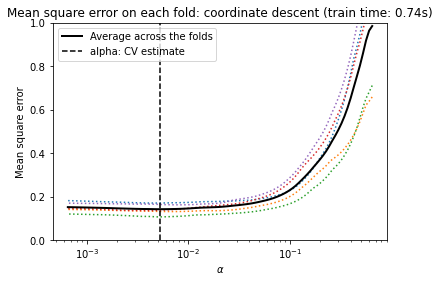

In [254]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
import time
start_time = time.time()
model =make_pipeline(StandardScaler(), LassoCV(cv=5)).fit(x_poly2, y_train)
fit_time = time.time() - start_time
import matplotlib.pyplot as plt

ymin, ymax = 0, 1
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)


## RIDGE

In [260]:
# I using the polynomial grade = 2 to fit ridge
from sklearn.linear_model import Ridge
model = Ridge(alpha=0)
model.fit(x_poly2, y_train)
y_train_predict= model.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.8762169124427329

In [261]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=2)
model.fit(x_poly2, y_train)
y_train_predict= model.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.8944299966611323

In [262]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(x_poly2, y_train)
y_train_predict= model.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.8871334520294629

In [267]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(x_poly2, y_train)
y_train_predict= model.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.8962391347890201

In [313]:
## Ridge with k-fold cross validation and search the best Alpha
from sklearn.linear_model import RidgeCV
# Lasso with 8 fold cross-validation
model = RidgeCV(alphas=[0.001,0.01,1,10,15,20,25,30])
# Fit model
model.fit(x_poly2, y_train)
# Best Alpha
print("Estimated regularization parameter alpha: %s" % model.alpha_)

Estimated regularization parameter alpha: 10.0


In [314]:
from sklearn.linear_model import Ridge
ridge_best = Ridge(alpha=model.alpha_)
ridge_best.fit(x_poly2, y_train)
y_train_predict= ridge_best.predict(x_poly2)
r2_score(y_train, y_train_predict)

0.8871334520294629

In [294]:
#Coeficients and Feautes Ridge Lasso
print(list(zip(lasso_best.coef_, X)))

[(0.0, '1stFlrSF'), (0.42422791999637594, '2ndFlrSF'), (0.21686631454054084, 'OverallQual_3'), (-0.46795398853441195, 'OverallQual_4'), (-0.5242886152676051, 'OverallQual_5'), (-0.4157348594076617, 'OverallQual_6'), (-0.20378884394755184, 'OverallQual_8'), (0.19920305071772307, 'OverallQual_9'), (0.0, 'OverallQual_10'), (0.10792581845934138, 'OverallCond_5'), (0.348447589362209, 'OverallCond_6'), (0.11448408907386817, 'OverallCond_7'), (0.1780762672421573, 'OverallCond_8'), (0.1669904223565187, 'OverallCond_9'), (0.23395729089224457, 'RoofMatl_WdShngl'), (0.0, 'KitchenAbvGr_2'), (-0.18527379578151149, 'TotRmsAbvGrd_3'), (0.022953625162137493, 'TotRmsAbvGrd_12'), (0.0, 'GarageCars_3')]


## Model Evaluation with Test Data Frame ##

In [296]:
X_train_rfe.columns

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'RoofMatl_WdShngl', 'KitchenAbvGr_2',
       'TotRmsAbvGrd_3', 'TotRmsAbvGrd_12', 'GarageCars_3'],
      dtype='object')

In [298]:
columns_names = X_train_rfe.columns.values
columns_names

array(['1stFlrSF', '2ndFlrSF', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'RoofMatl_WdShngl', 'KitchenAbvGr_2', 'TotRmsAbvGrd_3',
       'TotRmsAbvGrd_12', 'GarageCars_3'], dtype=object)

In [300]:
X_test_rfe = X_test[columns_names]

In [301]:
X_test_rfe.columns.values

array(['1stFlrSF', '2ndFlrSF', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'RoofMatl_WdShngl', 'KitchenAbvGr_2', 'TotRmsAbvGrd_3',
       'TotRmsAbvGrd_12', 'GarageCars_3'], dtype=object)

In [304]:
## Linear Regression Evaluation
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_predict= lr_7.predict(X_test_rfe)
r2_score(y_test, y_test_predict)

0.653067277449447

In [320]:
# Polynomial Regression model using the last Data Set Test
from sklearn.preprocessing import PolynomialFeatures
poly2_test = PolynomialFeatures(degree=2)
x_poly2_test = poly2.fit_transform(X_test_rfe) 
model2_test = LinearRegression() 
model2_test.fit(x_poly2_test, y_test)
y_test_predict= model2_test.predict(x_poly2_test)
r2_score(y_test, y_test_predict)

0.8261585121765552

In [326]:
# Lasso
# I use the polynomial grade = 2 to fit lasso
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.0010064630116739318)
model.fit(x_poly2_test, y_test)
y_test_predict= model.predict(x_poly2_test)
r2_score(y_test, y_test_predict)

0.8836492008199553

In [328]:
# Ridge
from sklearn.linear_model import Ridge
ridge_best = Ridge(alpha=10)
ridge_best.fit(x_poly2_test, y_test)
y_test_predict= ridge_best.predict(x_poly2_test)
r2_score(y_test, y_test_predict)

0.8681347844360414

## Conclusions ## 

In [331]:
## The best model is  Lasso qwith alpha = 0.0010064630116739318 , with a R2 = 0.8836492008199553 in test  is not overfititng and R2  in train and test is similar 